<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.500364,53.188797,63.085302,14.948804,220.723266,201.745597,18.977670
1,0.0,1.0,79.051814,51.992605,92.046508,-54.062241,179.028685,254.959010,-75.930325
2,0.0,2.0,75.614267,44.351676,69.048725,15.993785,215.008453,200.306654,14.701799
3,0.0,3.0,39.139711,24.760606,20.796648,65.041610,159.738575,56.979893,102.758682
4,0.0,4.0,67.770925,29.886048,26.534299,-71.954596,62.236675,97.646558,-35.409883
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.574137,65.166008,56.037866,-71.700888,91.077123,151.696156,-60.619033
19996,999.0,16.0,87.187198,22.096252,50.103625,-14.109949,155.277126,178.856518,-23.579392
19997,999.0,17.0,81.431232,21.881123,96.669426,-26.197645,183.784136,147.420163,36.363973
19998,999.0,18.0,76.272573,72.571537,85.672348,3.591887,248.108344,221.378550,26.729794


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.500364,53.188797,63.085302,14.948804,220.723266,201.745597,18.977670
1,0.0,1.0,79.051814,51.992605,92.046508,-54.062241,179.028685,254.959010,-75.930325
2,0.0,2.0,75.614267,44.351676,69.048725,15.993785,215.008453,200.306654,14.701799
3,0.0,3.0,39.139711,24.760606,20.796648,65.041610,159.738575,56.979893,102.758682
4,0.0,4.0,67.770925,29.886048,26.534299,-71.954596,62.236675,97.646558,-35.409883
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.574137,65.166008,56.037866,-71.700888,91.077123,151.696156,-60.619033
19996,999.0,16.0,87.187198,22.096252,50.103625,-14.109949,155.277126,178.856518,-23.579392
19997,999.0,17.0,81.431232,21.881123,96.669426,-26.197645,183.784136,147.420163,36.363973
19998,999.0,18.0,76.272573,72.571537,85.672348,3.591887,248.108344,221.378550,26.729794


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    79.500364  53.188797  63.085302  14.948804  220.723266   
      1.0    79.051814  51.992605  92.046508 -54.062241  179.028685   
      2.0    75.614267  44.351676  69.048725  15.993785  215.008453   
      3.0    39.139711  24.760606  20.796648  65.041610  159.738575   
      4.0    67.770925  29.886048  26.534299 -71.954596   62.236675   
...                ...        ...        ...        ...         ...   
999.0 15.0   31.574137  65.166008  56.037866 -71.700888   91.077123   
      16.0   87.187198  22.096252  50.103625 -14.109949  155.277126   
      17.0   81.431232  21.881123  96.669426 -26.197645  183.784136   
      18.0   76.272573  72.571537  85.672348   3.591887  248.108344   
      19.0   51.382364  21.966299  52.315034  -3.783024  131.880673   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    201.745597   18.977670  
      1.0    254.959010  -75.930325  
      2.0    200.306654   14.701799  
      3.0     56.979893  102.758682  
      4.0     97.646558  -35.409883  
...                 ...         ...  
999.0 15.0   151.696156  -60.619033  
      16.0   178.856518  -23.579392  
      17.0   147.420163   36.363973  
      18.0   221.378550   26.729794  
      19.0   119.721019   12.159655  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    79.500364  53.188797  63.085302  14.948804  220.723266   
      1.0    79.051814  51.992605  92.046508 -54.062241  179.028685   
      2.0    75.614267  44.351676  69.048725  15.993785  215.008453   
      3.0    39.139711  24.760606  20.796648  65.041610  159.738575   
      4.0    67.770925  29.886048  26.534299 -71.954596   62.236675   
...                ...        ...        ...        ...         ...   
999.0 15.0   31.574137  65.166008  56.037866 -71.700888   91.077123   
      16.0   87.187198  22.096252  50.103625 -14.109949  155.277126   
      17.0   81.431232  21.881123  96.669426 -26.197645  183.784136   
      18.0   76.272573  72.571537  85.672348   3.591887  248.108344   
      19.0   51.382364  21.966299  52.315034  -3.783024  131.880673   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    201.745597   18.977670  
      1.0    254.959010  -75.930325  
      2.0    200.306654   14.701799  
      3.0     56.979893  102.758682  
      4.0     97.646558  -35.409883  
...                 ...         ...  
999.0 15.0   151.696156  -60.619033  
      16.0   178.856518  -23.579392  
      17.0   147.420163   36.363973  
      18.0   221.378550   26.729794  
      19.0   119.721019   12.159655  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.500364,53.188797,63.085302,14.948804,220.723266,201.745597,18.977670
1,0.0,1.0,79.051814,51.992605,92.046508,-54.062241,179.028685,254.959010,-75.930325
2,0.0,2.0,75.614267,44.351676,69.048725,15.993785,215.008453,200.306654,14.701799
3,0.0,3.0,39.139711,24.760606,20.796648,65.041610,159.738575,56.979893,102.758682
4,0.0,4.0,67.770925,29.886048,26.534299,-71.954596,62.236675,97.646558,-35.409883
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.574137,65.166008,56.037866,-71.700888,91.077123,151.696156,-60.619033
19996,999.0,16.0,87.187198,22.096252,50.103625,-14.109949,155.277126,178.856518,-23.579392
19997,999.0,17.0,81.431232,21.881123,96.669426,-26.197645,183.784136,147.420163,36.363973
19998,999.0,18.0,76.272573,72.571537,85.672348,3.591887,248.108344,221.378550,26.729794


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    79.500364  53.188797  63.085302  14.948804  220.723266   
      1.0    79.051814  51.992605  92.046508 -54.062241  179.028685   
      2.0    75.614267  44.351676  69.048725  15.993785  215.008453   
      3.0    39.139711  24.760606  20.796648  65.041610  159.738575   
      4.0    67.770925  29.886048  26.534299 -71.954596   62.236675   
...                ...        ...        ...        ...         ...   
999.0 15.0   31.574137  65.166008  56.037866 -71.700888   91.077123   
      16.0   87.187198  22.096252  50.103625 -14.109949  155.277126   
      17.0   81.431232  21.881123  96.669426 -26.197645  183.784136   
      18.0   76.272573  72.571537  85.672348   3.591887  248.108344   
      19.0   51.382364  21.966299  52.315034  -3.783024  131.880673   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    201.745597   18.977670  
      1.0    254.959010  -75.930325  
      2.0    200.306654   14.701799  
      3.0     56.979893  102.758682  
      4.0     97.646558  -35.409883  
...                 ...         ...  
999.0 15.0   151.696156  -60.619033  
      16.0   178.856518  -23.579392  
      17.0   147.420163   36.363973  
      18.0   221.378550   26.729794  
      19.0   119.721019   12.159655  

[20000 rows x 7 columns]

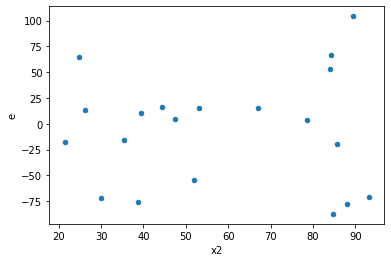

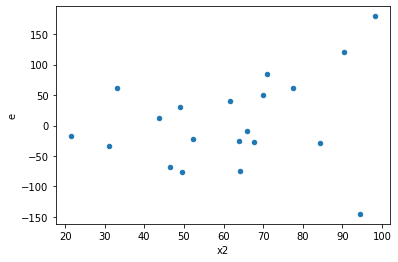

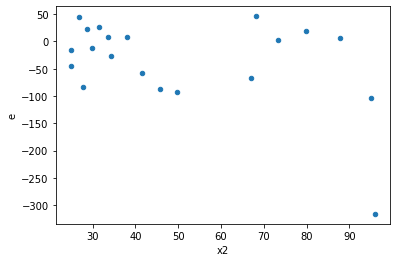

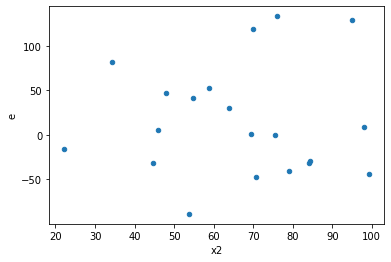

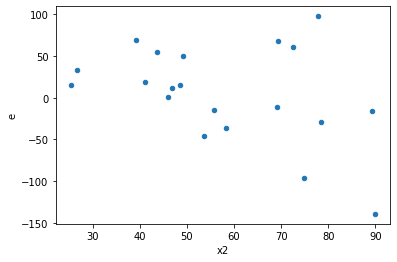

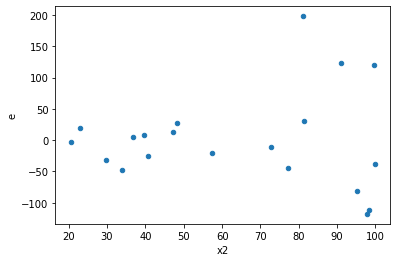

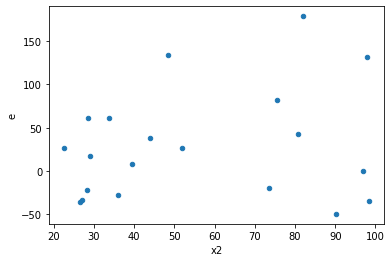

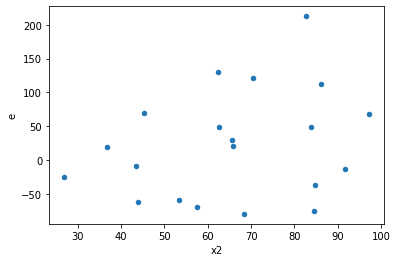

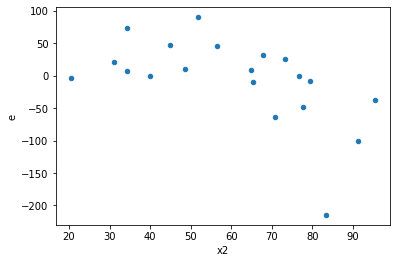

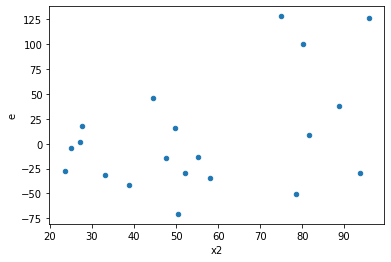

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,6072.672700814914,7639.851896047375,1214.5345401629827,1527.970379209475,1.2580707494777639,0.8072430423722996,0.5963784788138502,0.4036215211861498,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,7342.54725237701,55671.80784076397,1468.509450475402,11134.361568152794,7.58208370027735,0.04421367021026801,0.977893164894866,0.022106835105134004,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,8962.435170277553,48503.23921377508,1792.4870340555105,9700.647842755016,5.41183710590489,0.08746972610293136,0.9562651369485343,0.04373486305146568,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,12315.98689037454,35543.85282091976,2463.1973780749076,7108.770564183952,2.885993070413121,0.2695805371036033,0.8652097314481983,0.13479026855180165,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,19384.25244019148,31120.561694997454,3876.850488038296,6224.112338999491,1.6054558611954417,0.6160642064277362,0.6919678967861319,0.3080321032138681,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,16626.72733839458,52273.28901794964,3325.345467678916,10454.657803589927,3.143931331407577,0.23435575314787793,0.882822123426061,0.11717787657393897,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,5605.291721647819,11910.74125559938,1121.0583443295639,2382.148251119876,2.124910146888468,0.4276909987388069,0.7861545006305966,0.21384549936940345,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,2358.878059092618,25841.25970762488,471.7756118185236,5168.251941524975,10.954894259165373,0.02004882516415174,0.9899755874179241,0.01002441258207587,Reject005=0 : Heteroscedasticity
15.0,5.0,5.0,7312.062080556966,35364.73303572925,1462.4124161113932,7072.94660714585,4.8364924485208265,0.10861425911655243,0.9456928704417238,0.05430712955827621,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,6072.672700814914,7639.851896047375,1214.5345401629827,1527.970379209475,1.2580707494777639,0.8072430423722996,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,7342.54725237701,55671.80784076397,1468.509450475402,11134.361568152794,7.58208370027735,0.04421367021026801,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,8962.435170277553,48503.23921377508,1792.4870340555105,9700.647842755016,5.41183710590489,0.08746972610293136,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,12315.98689037454,35543.85282091976,2463.1973780749076,7108.770564183952,2.885993070413121,0.2695805371036033,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,14451.013188577417,12911.504675803446,2890.2026377154834,2582.3009351606893,0.8934670882460441,0.9046353807302911,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,19384.25244019148,31120.561694997454,3876.850488038296,6224.112338999491,1.6054558611954417,0.6160642064277362,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,13574.681021866389,8911.90665322586,2714.9362043732776,1782.381330645172,0.6565094707470746,0.6554970276159983,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,16626.72733839458,52273.28901794964,3325.345467678916,10454.657803589927,3.143931331407577,0.23435575314787793,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,28379.272740987086,13428.325616889555,5675.854548197417,2685.665123377911,0.47317370460644487,0.4309609141621426,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      784
Reject005=0 : Heteroscedasticity    216
Name: Result_test, dtype: int64